# Chapter 7: Multifactor Models and Performance Measures

In Chapter 6, Capital Asset Pricing Model, we discussed the simplest one-factor linear
model: CAPM. As mentioned, this one-factor linear model serve as a benchmark for
more advanced and complex models. In this chapter, we will focus on the famous
Fama-French three-factor model, Fama-French-Carhart four-factor model, and
Fama-French five-factor model. After understanding those models, readers should
be able to develop their own multifactor linear models, such as by adding Gross
Domestic Product (GDP), Consumer Price Index (CPI), a business cycle indicator
or other variables as an extra factor(s). In addition, we will discuss performance
measures, such as the Sharpe ratio, Treynor ratio, and Jensen's alpha. In particular,
the following topics will be covered in this chapter:

• Introduction to the Fama-French three-factor model

• Fama-French-Carhart four-factor model

• Fama-French five-factor model

• Other multiplefactor models

• Sharpe ratio and Treynor ratio

• Lower partial standard deviation and Sortino ratio

• Jensen's alpha

• How to merge different datasets

## Introduction to the Fama-French three-factor model

First let's consider the basic three-factor linear model. See my notes on google docs for the full explanation.

Below, we will write some basic python code to illustrate this.


In [1]:
import statsmodels.api as sm
import pandas as pd

y = [0.065, 0.0265, -0.0593, -0.001,0.0346]
x1 = [0.055, -0.09, -0.041,0.045,0.022]
x2 = [0.025, 0.10, 0.021,0.145,0.012]
x3= [0.015, -0.08, 0.341,0.245,-0.022]
df= pd.DataFrame({"y":y,"x1":x1, 'x2':x2,'x3':x3})

y= df['y']
x=df[['x1','x2','x3']]
x = sm.add_constant(x) 

result=sm.OLS(y,x).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     8.073
Date:                Tue, 19 Mar 2024   Prob (F-statistic):              0.252
Time:                        11:17:28   Log-Likelihood:                 16.837
No. Observations:                   5   AIC:                            -25.67
Df Residuals:                       1   BIC:                            -27.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0336      0.013      2.518      0.2

/Users/Leo/.pyenv/versions/3.10.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


We should note that the textbook still assumes pandas has an OLS module, though this has been evidently deprecated in favor of statsmodel.api. WE will be using statsmodel.api

In [2]:
import scipy.stats as stats
alpha=0.05
dfNumerator=3
dfDenominator=1
f=stats.f.ppf(q=1-alpha, dfn=dfNumerator, dfd=dfDenominator)
print(f)

215.70734536960884


The confidence level is equal to 1 minus alpha, that is, 95% in this case. The higher
the confidence level, the more reliable the result, such as 99% instead of 95%. The
most-used confidence levels are 90%, 95%, and 99%. dfNumeratro (dfDenominator)
is the degree of freedom for the numerator (denominator), which depends on the
simple sizes. From the preceding result of OLS regression, we know that those two
values are 3 and 1.


From the preceding values, F=8.1 < 215.7 (critical F-value), we should accept the null
hypothesis that all coefficients are zero, that is, the quality of the model is not good.
On the other hand, a P-value of 0.25 is way higher the critical value of 0.05. It also
means that we should accept the null hypothesis. This makes sense since we have
entered those values without any meanings.


Consider a second example that uses IBM historic data.

In [3]:
import datetime
from datetime import datetime, timedelta
import yfinance as yf

now = datetime.now()
five_years_ago = now - timedelta(days=365 * 5)
# Format the output to display only the time and year
formatted_now = datetime(now.year, now.month, now.day)
formatted_before = datetime(five_years_ago.year, five_years_ago.month, five_years_ago.day)

stock = yf.download('IBM',start = formatted_before, end = formatted_now)
stock.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-12,192.460007,199.179993,192.149994,197.779999,197.779999,5880100
2024-03-13,197.550003,198.100006,195.320007,196.699997,196.699997,3993300
2024-03-14,196.949997,197.750000,192.119995,193.429993,193.429993,4109600
2024-03-15,191.990005,193.059998,190.699997,191.070007,191.070007,8827900
2024-03-18,191.699997,193.229996,190.320007,191.690002,191.690002,5406600


Now let's consider the three factor model, with Adj Close as the dependent variable and Open, High, Close as the independent ones.

In [4]:
X = stock[['Open','High','Volume']]
Y = stock['Adj Close']
X = sm.add_constant(X)

result=sm.OLS(Y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     2735.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:17:42   Log-Likelihood:                -4274.9
No. Observations:                1257   AIC:                             8558.
Df Residuals:                    1253   BIC:                             8578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.6978      1.914    -24.923      0.0

The first three commands import three Python modules. The command line of x=sm.
add_constant(x) will add a column of 1s. If the line is missing, we would force a
zero intercept. To enrich our experience of running a three-factor linear model, this
time, a different OLS function is applied. The advantage of using the statsmodels.
apilsm.OLS() function is that we could find more information about our results,
such as Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC),
skew, and kurtosis. The discussion of their definitions will be postponed to the next
chapter (Chapter 8, Time-Series Analysis). The corresponding output after running the
preceding Python program is given here:

## Fama-French three-factor model

TBD

## How to Merge Datasets

Consider the following code as a means to merge datasets

In [5]:
import pandas as pd
import scipy as s
x= pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']})

y = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K6'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']})

In [6]:
print(s.shape(x))
print(x)

(4, 3)
  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3


/var/folders/k4/npf5jb1d4x13y6z87pdgxb9m0000gp/T/ipykernel_19956/3160869111.py:1: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead
  print(s.shape(x))


In [7]:
print(s.shape(y))
print(y)

(4, 3)
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K6  C3  D3


/var/folders/k4/npf5jb1d4x13y6z87pdgxb9m0000gp/T/ipykernel_19956/3132444424.py:1: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead
  print(s.shape(y))


Now assume we want to merge these two datasets using the common column "key". Since the common values of this variable are K0, K1
and K2. The final result should have three rows and five columns since K3 and K6
are not the common values by the two datasets; see the result shown here:

In [5]:
result = pd.merge(x,y, on='key')
print(result)

  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2


As we can see, key was not duplicated when merged. Note that the merge function can be further expanded upon to include various joins - full / outer, inner, left, and right. The format of an inner join demands both datasets have the same items. An analogy
is students from a family with both parents. The left join is based on the left dataset.
In other words, our benchmark is the first dataset (left). An analogy is choosing
students from families with a mum. The right is the opposite of the left, that is, the
benchmark is the second dataset (right). The outer is the full dataset which contain
both datasets, the same as students from all families: with both parents, with mum
only, and with dad only. We illustrate an example below:

In [8]:
import pandas as pd
import scipy as sp
x= pd.DataFrame({'YEAR': [2010,2011, 2012, 2013],
    'IBM': [0.2, -0.3, 0.13, -0.2],
    'WMT': [0.1, 0, 0.05, 0.23]})
y = pd.DataFrame({'YEAR': [2011,2013,2014, 2015],
    'C': [0.12, 0.23, 0.11, -0.1],
    'SP500': [0.1,0.17, -0.05, 0.13]})

print(pd.merge(x,y, on='YEAR'))
print(pd.merge(x,y, on='YEAR',how='outer'))
print(pd.merge(x,y, on='YEAR',how='left'))
print(pd.merge(x,y, on='YEAR',how='right'))

   YEAR  IBM   WMT     C  SP500
0  2011 -0.3  0.00  0.12   0.10
1  2013 -0.2  0.23  0.23   0.17
   YEAR   IBM   WMT     C  SP500
0  2010  0.20  0.10   NaN    NaN
1  2011 -0.30  0.00  0.12   0.10
2  2012  0.13  0.05   NaN    NaN
3  2013 -0.20  0.23  0.23   0.17
4  2014   NaN   NaN  0.11  -0.05
5  2015   NaN   NaN -0.10   0.13
   YEAR   IBM   WMT     C  SP500
0  2010  0.20  0.10   NaN    NaN
1  2011 -0.30  0.00  0.12   0.10
2  2012  0.13  0.05   NaN    NaN
3  2013 -0.20  0.23  0.23   0.17
   YEAR  IBM   WMT     C  SP500
0  2011 -0.3  0.00  0.12   0.10
1  2013 -0.2  0.23  0.23   0.17
2  2014  NaN   NaN  0.11  -0.05
3  2015  NaN   NaN -0.10   0.13


When the common variable has different names in those two datasets, we should
specify their names by using left_on='left_name' and right_on='another_
name'; see the following code:

In [9]:
import pandas as pd
import scipy as sp
x= pd.DataFrame({'YEAR': [2010,2011, 2012, 2013],
    'IBM': [0.2, -0.3, 0.13, -0.2],
    'WMT': [0.1, 0, 0.05, 0.23]})
y = pd.DataFrame({'date': [2011,2013,2014, 2015],
    'C': [0.12, 0.23, 0.11, -0.1],
    'SP500': [0.1,0.17, -0.05, 0.13]})
print(pd.merge(x,y, left_on='YEAR',right_on='date'))

   YEAR  IBM   WMT  date     C  SP500
0  2011 -0.3  0.00  2011  0.12   0.10
1  2013 -0.2  0.23  2013  0.23   0.17


If we intend to merge based on the index (row numbers), we specify that left_
index='True', and right_index='True'; see the following code. In a sense, since
both datasets have four rows, we simply put them together, row by row. The true
reason is that for those two datasets, there is no specific index. For a comparison, the
ffMonthly.pkl data has the date as its index:

In [10]:
import pandas as pd
import scipy as sp
x= pd.DataFrame({'YEAR': [2010,2011, 2012, 2013],
    'IBM': [0.2, -0.3, 0.13, -0.2],
    'WMT': [0.1, 0, 0.05, 0.23]})
y = pd.DataFrame({'date': [2011,2013,2014, 2015],
    'C': [0.12, 0.23, 0.11, -0.1],
    'SP500': [0.1,0.17, -0.05, 0.13]})
print(pd.merge(x,y, right_index=True,left_index=True))

   YEAR   IBM   WMT  date     C  SP500
0  2010  0.20  0.10  2011  0.12   0.10
1  2011 -0.30  0.00  2013  0.23   0.17
2  2012  0.13  0.05  2014  0.11  -0.05
3  2013 -0.20  0.23  2015 -0.10   0.13


We will be following a separate finance module for analyzing fama french models.

In [13]:
# -*- coding: utf-8 -*-
#import libraries
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import sqrt
import os
from scipy import stats
from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
import getFamaFrenchFactors as gff
import yfinance as yf
import matplotlib.colors as mcolors
import math
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [14, 10]

Here we pick the asset of interest and the period we want to analyze. The starting point picked is: ' "2012-6-1" ' which provides 11 years worth of data. The asset that will be analyzed is the stock of 'Alphabet Inc'.

In [14]:
#choose asset
tickers = ['GOOGL']

#choose the start  and enddate:
start = dt.datetime(2012,6,1)
end = dt.datetime.now()

#import daily closiing prices
prices = []

#create a dataframe

dataset = yf.download(tickers,
                            start=start,
                            end = end)

#check for missing variables:
print('The number of missing values is: ',dataset.isnull().sum())

[*********************100%***********************]  1 of 1 completed
The number of missing values is:  Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Overall trend of the asset:

Now we create charts of the daily price change and the returns. We will use the natural logarith of the price value

Text(0.5, 1.0, 'Logarithmic price')

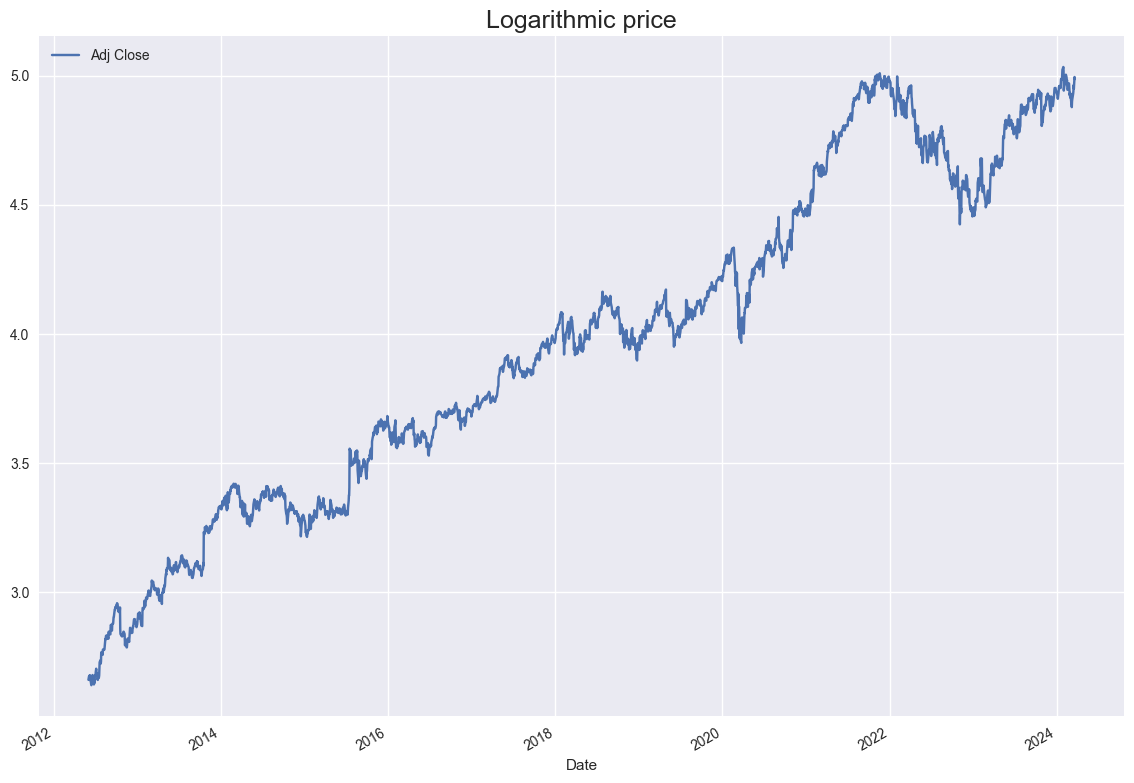

In [15]:

#plot log prices
plt.figure()
np.log(dataset['Adj Close']).plot()
plt.legend(loc='best')
plt.title('Logarithmic price',fontsize=18)

Calculate adjusted returns.

Text(0.5, 0.98, 'Plots of historical returns')

<Figure size 1400x1000 with 0 Axes>

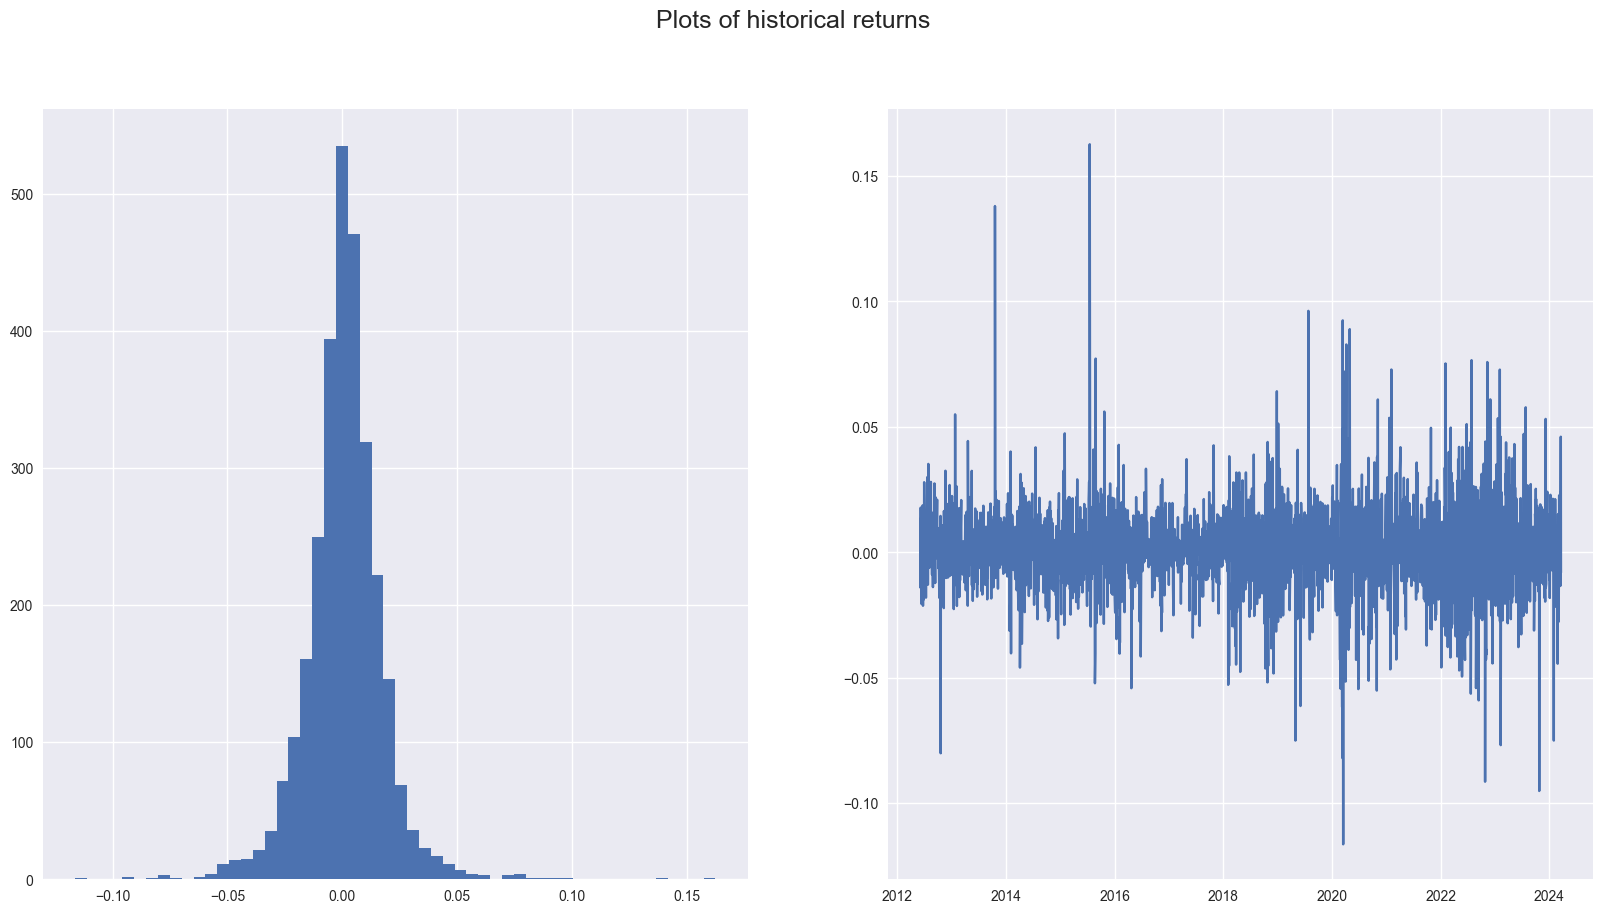

In [16]:
def rets(x):
    return (x - x.shift(1))/x.shift(1)
    
returns = rets(dataset['Adj Close'])

#lets get plots of the daily returns:
plt.figure()
fig1, axs = plt.subplots(1, 2,figsize=(20, 10))
axs[0].hist(returns,bins=round(sqrt(len(returns))))
axs[1].plot(returns)
fig1.suptitle('Plots of historical returns',fontsize=18)

Get monthly returns and do a stationarity test:
In this section we aggregate the daily returns into monthly returns and make a statistical test to determine whether the monthly returns are time-dependent or not as they are the variable that we are going to be working with.

ADF Statistic: -13.873573
p-value: 0.000000


<Figure size 1400x1000 with 0 Axes>

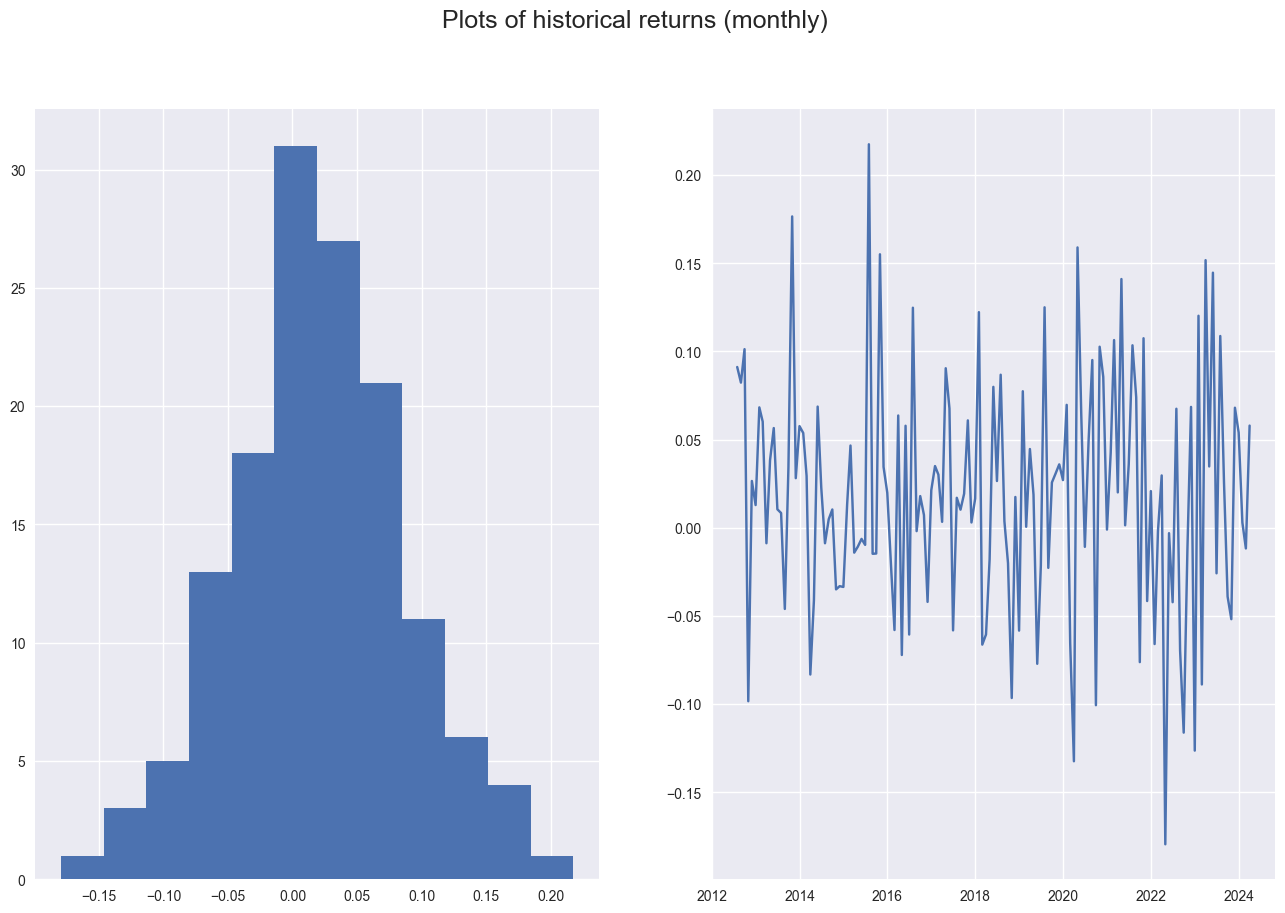

In [17]:
#-------Monthly data
#resample data to monthly:
mon = dataset['Adj Close'].resample('1M').last()
mon_rets = mon.pct_change().dropna()

#plots of monthly rets:
plt.figure()
fig2, axs = plt.subplots(1, 2,figsize=(16, 10))
axs[0].hist(mon_rets,bins=round(sqrt(len(mon_rets))))
axs[1].plot(mon_rets)
fig2.suptitle('Plots of historical returns (monthly)',fontsize=18)

#stationarity test
adf = adfuller(mon_rets)
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])

We notice that our data is stationary, which means that the target variable is suitable for statistical modelling using a linear regression
The next section begins with an import of the fama-french 3-factor model variables: excess return on the market, the size of firms and the book-to-market values.

In [18]:
#get Fama French factors
ff3 = pd.DataFrame(gff.famaFrench3Factor(frequency='m'))

#create a seq of dates
date_seq = pd.date_range(start=start, end=end,freq='M')

#set date columns
ff3 = ff3.rename(columns = {'date_ff_factors':'Date'})

#merge data together
data = pd.merge(mon_rets,ff3,on='Date',how='left')
data = data.set_index('Date')

#do an NA check:
print('Missing values in the data: ',data.isna().sum())
data = data.rename(columns={'Adj Close':'Google_stock'})
data = data.dropna()
data

Missing values in the data:  Adj Close    0
Mkt-RF       2
SMB          2
HML          2
RF           2
dtype: int64


,Google_stock,Mkt-RF,SMB,HML,RF
Date,,,,,
2012-07-31,0.091196,0.0079,-0.0274,-0.0002,0.0000
2012-08-31,0.082342,0.0255,0.0047,0.0130,0.0001
2012-09-30,0.101315,0.0273,0.0050,0.0160,0.0001
2012-10-31,-0.098343,-0.0176,-0.0115,0.0359,0.0001
2012-11-30,0.026562,0.0078,0.0063,-0.0084,0.0001
...,...,...,...,...,...
2023-09-30,-0.038995,-0.0524,-0.0251,0.0152,0.0043
2023-10-31,-0.051811,-0.0319,-0.0387,0.0019,0.0047
2023-11-30,0.068101,0.0884,-0.0002,0.0164,0.0044


In this section we remove the missing values and create plots in order to visualize the Fama-french model factors.

Before we begin modelling it will be usefull to see how does our asset perform, compared to the fama-french factors. It would be more adequate to use a moving average of the factors in order to get a good feeling of the overall trends.

Google_stock correlation with market index: 0.6471462901816496
Google_stock correlation with small-company portfolio index: 0.04364006644468893
Google_stock correlation with value stocks index: -0.1618730890560433


<Figure size 1400x1000 with 0 Axes>

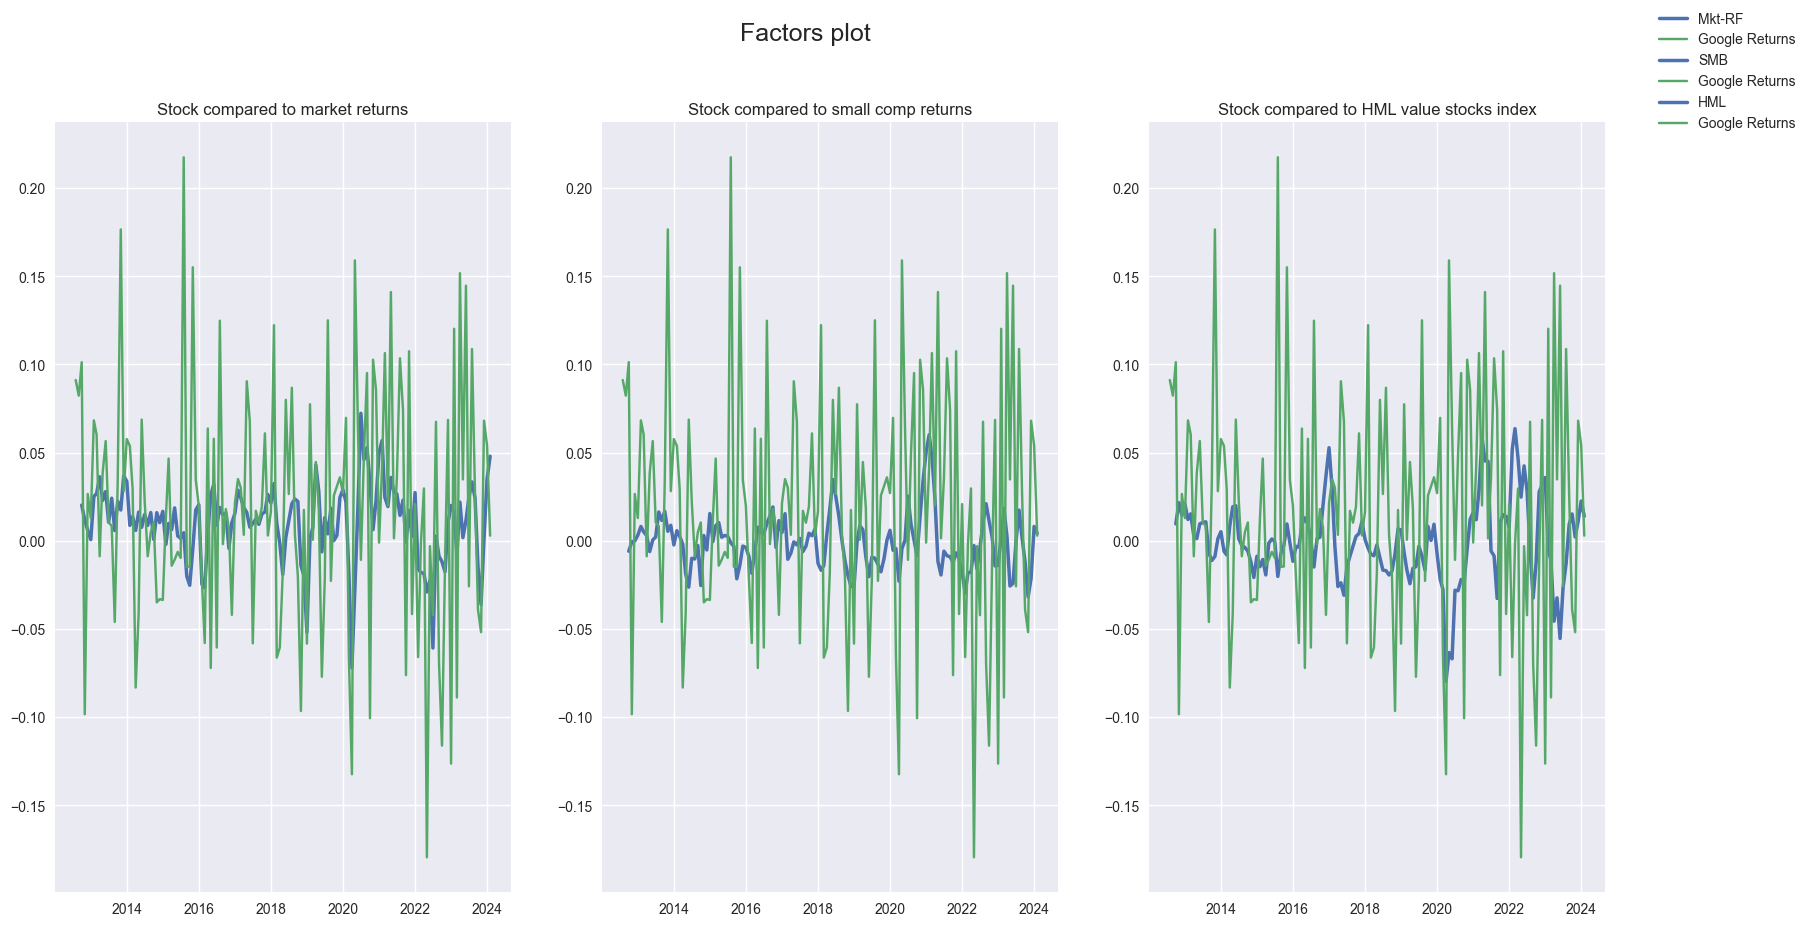

In [19]:
#drop NAs
data = data.dropna()

#set names for the target variable and factors:
stock = 'Google_stock'
factors = ['Mkt-RF', 'SMB', 'HML']

#plot fama-french factors:
plt.figure()
fig3, axs = plt.subplots(1, 3,figsize=(20, 10))
axs[0].plot(data['Mkt-RF'].rolling(3).mean(),linewidth=2.5, label = 'Mkt-RF')
axs[0].plot(data[stock], label = 'Google Returns')
axs[0].set_title('Stock compared to market returns')
axs[1].plot(data['SMB'].rolling(3).mean(),linewidth=2.5, label = "SMB")
axs[1].plot(data[stock], label = 'Google Returns')
axs[1].set_title('Stock compared to small comp returns')
axs[2].plot(data['HML'].rolling(3).mean(),linewidth=2.5, label = 'HML')
axs[2].plot(data[stock], label = 'Google Returns')
axs[2].set_title('Stock compared to HML value stocks index')
fig3.suptitle('Factors plot',fontsize=18)
fig3.legend(loc = 'upper right')

#calculate correlations
cor = data.corr()

print(f'{stock} correlation with market index:',cor['Mkt-RF'][0])
print(f'{stock} correlation with small-company portfolio index:',cor['SMB'][0])
print(f'{stock} correlation with value stocks index:',cor['HML'][0])

In [20]:
cor

,Google_stock,Mkt-RF,SMB,HML,RF
Google_stock,1.000000,0.647146,0.043640,-0.161873,-0.031854
Mkt-RF,0.647146,1.000000,0.301669,0.038892,-0.051386
SMB,0.043640,0.301669,1.000000,0.068666,-0.111148
HML,-0.161873,0.038892,0.068666,1.000000,-0.110832
RF,-0.031854,-0.051386,-0.111148,-0.110832,1.000000


By calculating the Pearson correlation coefficient we detect a strong positive linear relationship between the asset and the overall market trend. This is hardly a surprise, given that it is to be expected that an asset will be influenced by the macroeconomic situation. The other 2 factors are more specific and thus their relationship with the asset is much less pronounced. Now we build the initial regression model and estimate returns, based on the market 3 factors original data.

In [21]:
#set variables
Y = data['Google_stock'] - data['RF'] #substract the risk free rate

X = data[factors]

#Build model
from statsmodels.api import OLS

#build model
model = sm.OLS(Y, sm.tools.add_constant(X))
result = model.fit()

#examine results
print(result.summary())

#obtain average values:
avr = ff3.drop('Date',axis=1).apply(np.mean)

#evaluate expected returns for facebook 
Int,Mkt,SMB,HML = result.params

exp_returns = Mkt*avr['Mkt-RF'] + SMB*avr['SMB'] + HML*avr['HML']  
#here we drop the intercept, because it represents the excess return over the market

e_rets = exp_returns - data['RF'].mean()

print(f'The expected monthly return for {stock} is:',e_rets)
print(f'The expected annual return for {stock} is:',((1 + e_rets) ** 12) - 1) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     40.71
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           8.37e-19
Time:                        11:20:14   Log-Likelihood:                 222.99
No. Observations:                 139   AIC:                            -438.0
Df Residuals:                     135   BIC:                            -426.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0056      0.004      1.289      0.2

## Plotting the Coefficients

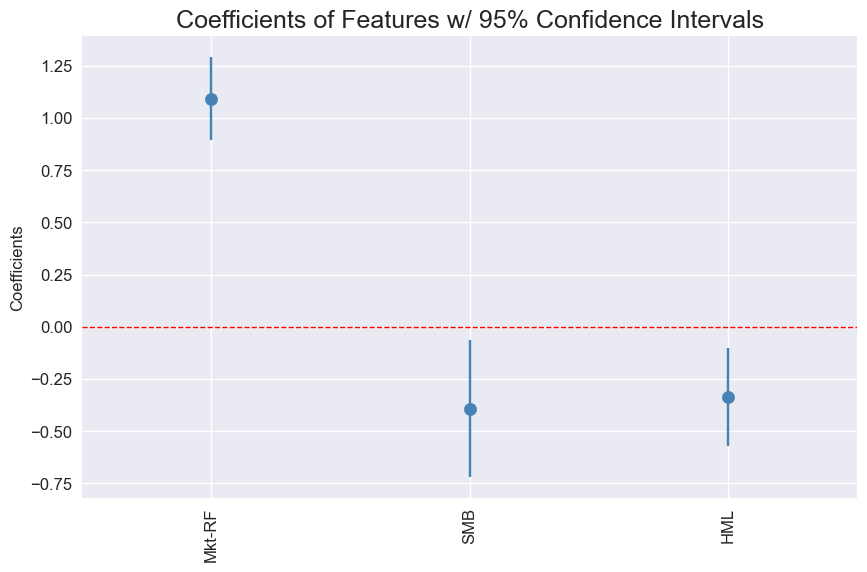

In [23]:
import numpy as np

#create dataframe of results summary 
coef_df = pd.DataFrame(result.summary().tables[1].data)
coef_df.columns = coef_df.iloc[0]

coef_df = coef_df.drop(0) #drop the extra row with column labels
coef_df = coef_df.set_index(coef_df.columns[0]) #set index to variable names 

#change datatype from object to float
coef_df = coef_df.astype(float)

#rename erros column
coef_df.rename(columns = {'std err':'std_err'},inplace = True)

# Drop the constant for plotting purposes
coef_df.drop(['const'],inplace=True)

#add factors to the dataframe to ease plotting
coef_df['factors'] = factors
coef_df['er_interval'] = coef_df['std_err']*1.959 # 95% confidence interval

#Plot coefficients
fig, ax = plt.subplots(figsize=(10, 6))

coef_df.plot(x='factors', y='coef', kind='bar',
        ax=ax, color='none', fontsize=12, 
        ecolor='steelblue',capsize=0,
        yerr='er_interval', legend=False)

plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=18)
ax.set_ylabel('Coefficients',fontsize=12)
ax.set_xlabel('',fontsize=12)

ax.scatter(x=np.arange(coef_df.shape[0]), 
        marker='o', s=80, 
        y=coef_df['coef'], color='steelblue')

ax.axhline(y=0, linestyle='--', color='red', linewidth=1) #line to define zero on the y-axis

In [24]:
coef_df

,coef,std_err,t,P>|t|,[0.025,0.975],factors,er_interval
,,,,,,,,
Mkt-RF,1.0923,0.102,10.712,0.000,0.891,1.294,Mkt-RF,0.199818
SMB,-0.3917,0.167,-2.344,0.021,-0.722,-0.061,SMB,0.327153
HML,-0.3378,0.120,-2.821,0.006,-0.575,-0.101,HML,0.235080


Based on these results, we can say with 95% confidence that all factors have an impact on google's stock returns.

### Bootstrapped linear regression
The bootsrap method will allow us to obtain distributions of the model parameters and thus it will enable us to quantify the uncertainty related with the estimation of the coefficients of our model much better.

The method leverages the properties of the Central Limit Theorem. The procedure consists of creating multiple random samples with replacement that posses similar, but slightly different characteristics (mean and standard deviation) and fitting a model on each sample to obtain a distribution of predictions: (5000 in this case). It also helps us to get a distribution and confidence intervals for the returns and standard erros of the model coeffictients. The values of these coeffictients are very important here, because we want to be able to infer the relationship between the assets returns and the market factors.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1400x1000 with 0 Axes>

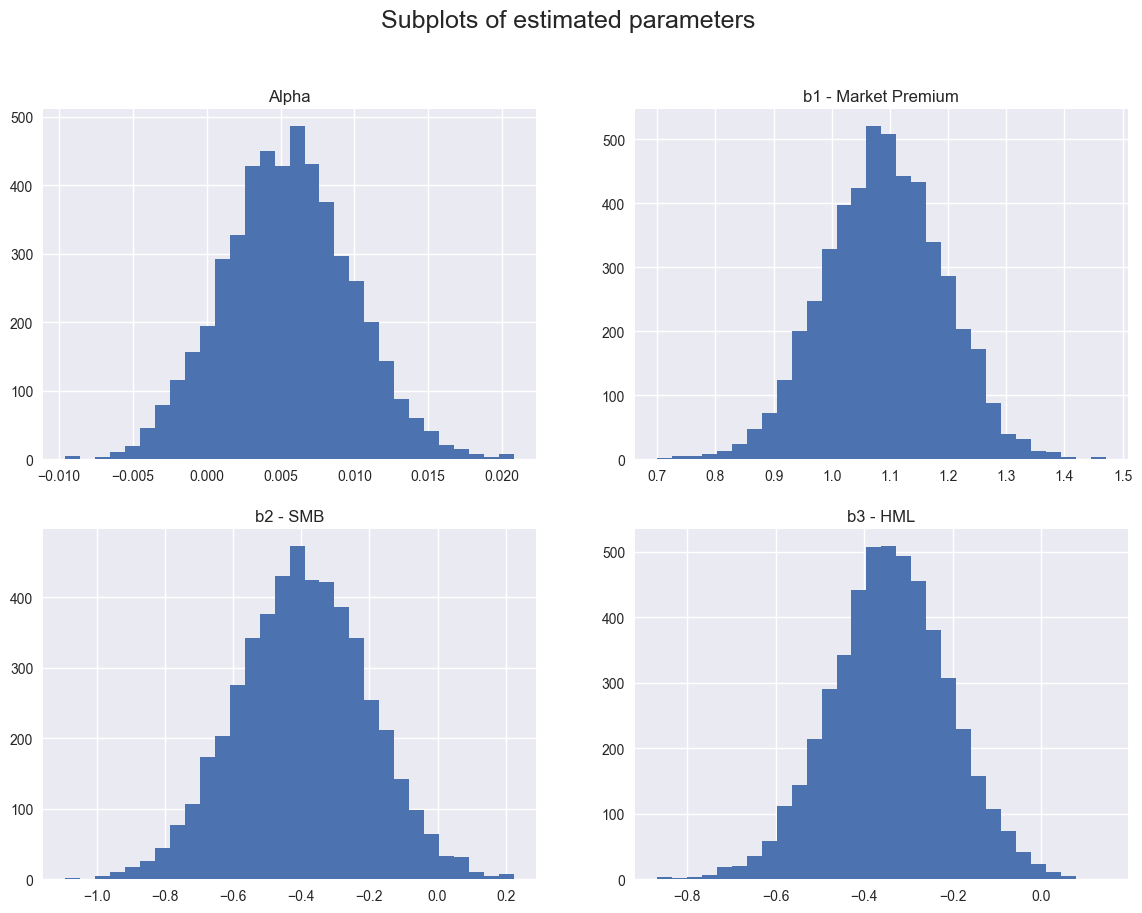

In [25]:
#get returns - risk free rate
data['returns'] = data['Google_stock'] - data['RF']

#define variables to be filled with the simulations
boot_betas = []
mod_beta = 0
boot_return = 0
boot_returns = []

#loop B times
for i in range(5000):

    sample = data.sample(n=len(data), replace=True)
    sample_means = sample.mean() #used to create the manual regression
    
    boot_model = sm.OLS(sample['returns'], sm.add_constant(sample[factors])) #here we have remove the risk free
    boot_result = boot_model.fit()
    
    mod_beta = boot_result.params
    boot_betas.append(mod_beta)
    
    boot_return = mod_beta[1]*sample_means['Mkt-RF'] + mod_beta[2]*sample_means['SMB'] + mod_beta[3]*sample_means['HML']
    
    boot_returns.append(boot_return)

#normality test:
r_test = stats.normaltest(boot_returns)

boot_betas = pd.DataFrame(boot_betas) #convert results to a dataframe

#visualize results distributions:
plt.figure()
fig4, axs = plt.subplots(2, 2)
axs[0,0].hist(boot_betas['const'],bins=30)
axs[0,0].set_title('Alpha')
axs[0,1].hist(boot_betas['Mkt-RF'],bins=30)
axs[0,1].set_title('b1 - Market Premium')
axs[1,0].hist(boot_betas['SMB'],bins=30)
axs[1,0].set_title('b2 - SMB')
axs[1,1].hist(boot_betas['HML'],bins=30)
axs[1,1].set_title('b3 - HML')
fig4.suptitle('Subplots of estimated parameters',fontsize=18)
plt.legend()

In [83]:
tests = boot_betas.apply(stats.normaltest)

for i in range(0,len(tests.iloc[1,:])):
    if tests.iloc[1,i] < 0.05:
        print(tests.columns[i]," is not normaly distributed")
    else: print(tests.columns[i]," is normaly distributed")
        
print(tests)        

const  is normaly distributed
Mkt-RF  is not normaly distributed
SMB  is normaly distributed
HML  is not normaly distributed
      const    Mkt-RF       SMB        HML
0  1.499792  8.385908  0.307671  12.405671
1  0.472416  0.015102  0.857413   0.002024


It appears some of the variables are not normally distributed, so we will conduct a bootstrapped linear regression to correct for bias.

In [85]:
#bias correction
z_hat = norm.ppf(np.mean(boot_betas['HML'] < HML)) #measure of skewness

#jackknife
index = np.arange(len(X)) #create index array
beta_i = np.zeros(len(factors))
beta_jn = []

for i in range(len(X)):

    model_i = sm.OLS(Y[index != i], X[index != i])
    
    result_i = model_i.fit()
    beta_i = result_i.params
    beta_jn.append(beta_i)
    
beta_jn = pd.DataFrame(beta_jn)    

#acceleration: 
ql = norm.ppf(0.05) #get standard normal values at given percentile
qu = norm.ppf(0.95)  
    
beta_bar = beta_jn.apply(np.mean)

num = sum((beta_bar['HML'] - beta_jn['HML'])**3)
denom = 6 * sum((beta_bar['HML'] - beta_jn['HML'])**2)**(3/2)
    
a_hat =  num / denom

l1 = norm.cdf(z_hat + (z_hat + ql)/(1-a_hat*(z_hat+ql)))
u1 = norm.cdf(z_hat + (z_hat + qu)/(1-a_hat*(z_hat+qu)))

print('Lowest coef value with 0.1 level of significance is: ',np.percentile(boot_betas['HML'],(l1*100)))
print('Highest coef value with 0.1 level of significance is:',np.percentile(boot_betas['HML'],(u1*100)))

Lowest coef value with 0.1 level of significance is:  -0.5754753237682734
Highest coef value with 0.1 level of significance is: -0.12427528195633944


Text(0.5, 1.0, 'Histogram of the bootsrapped HML coefficients')

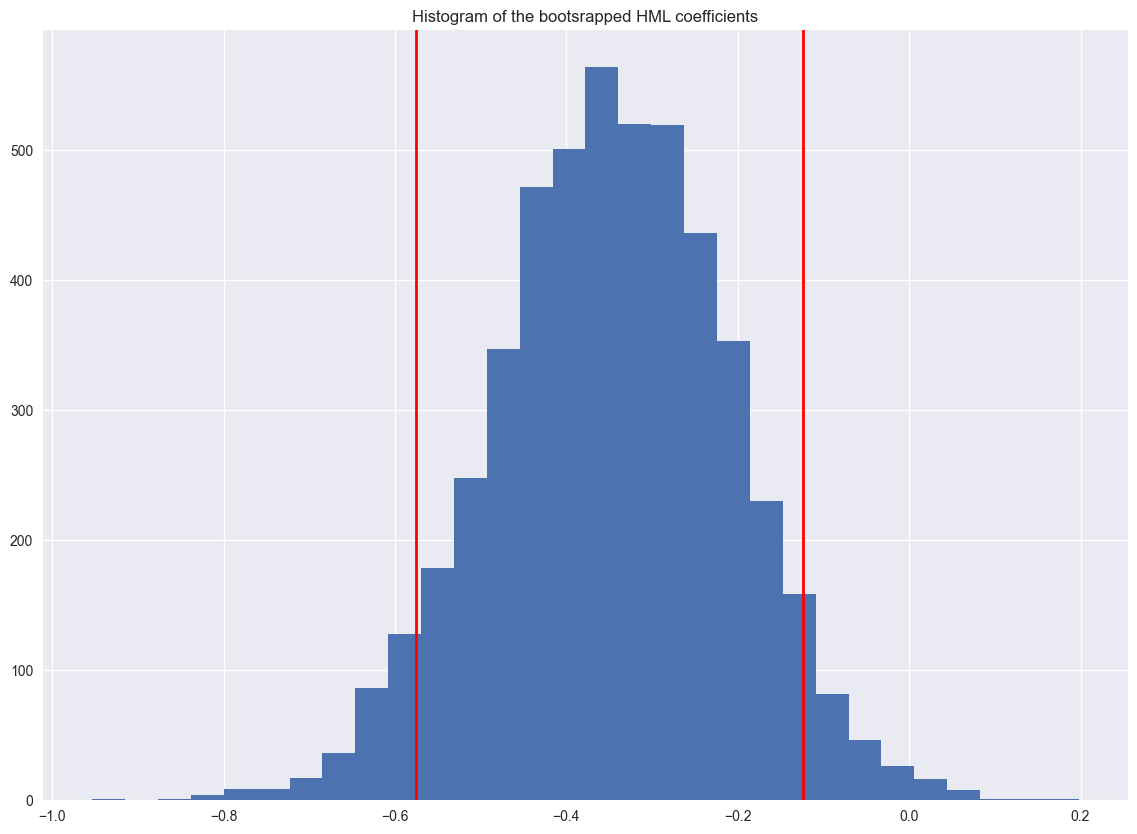

In [86]:
plt.figure()
plt.hist(boot_betas['HML'],bins=30)
plt.axvline(np.percentile(boot_betas['HML'],(l1*100)),color = 'red',linewidth=2)
plt.axvline(np.percentile(boot_betas['HML'],(u1*100)),color = 'red',linewidth=2)
plt.title('Histogram of the bootsrapped HML coefficients')

As we can see from the histogram of the simulated HML parameter distribution, the 0 value falls outside the range of the 0.05 alpha level. However, the probability of actually observing 0 is quite small. Let's calculate it.

In [87]:
print('Total percentage of estimations that are equal to, or are above 0 is: ',sum(boot_betas['HML'] >= 0) / len(boot_betas['HML']))

Total percentage of estimations that are equal to, or are above 0 is:  0.0062


We have now quantified the uncertainty tied to our model parameters. This might vary from simulation to simulation, but the overall effect of the uncertainty in the sample is captured, which may help us to make a decision based on the model - for example, now, that we know that the bias-corrected probability of the coefficient is very unlikely to be 0, we might want to decide to include it in the estimation of returns.

### Simulated returns
And finally, in the next section we will plot the obtained simulated values of the Alphabet Inc. stock returns:

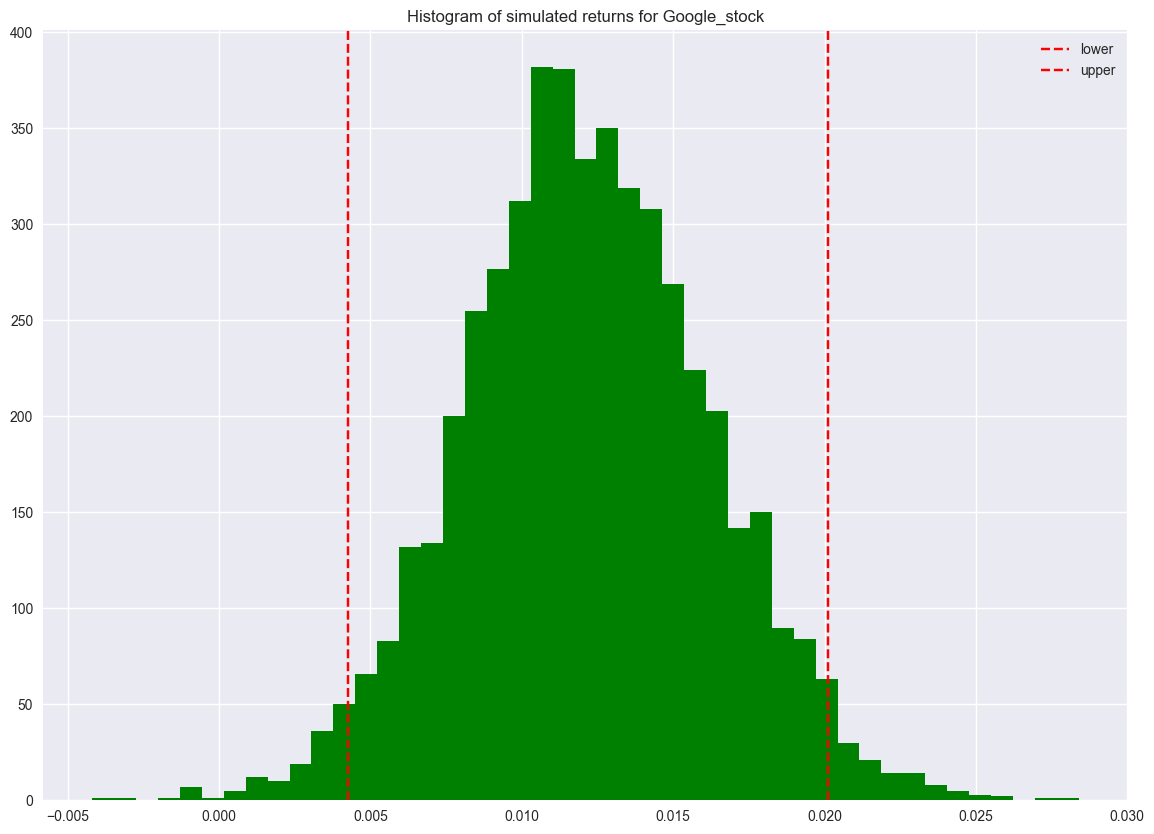

In [91]:
plt.figure()
plt.hist(boot_returns, alpha = 1,bins=45,color = 'green')
plt.axvline(np.percentile(boot_returns,2.5),color = 'red',linestyle = '--')
plt.axvline(np.percentile(boot_returns,97.5),color = 'red',linestyle = '--')
plt.title(f'Histogram of simulated returns for {stock}')
plt.legend(['lower','upper'])

In [90]:
print('The occurrences where asset returns fall below 0 are: ',sum(np.array(boot_returns) <= 0 / len(boot_returns)))
print(f'The average of expected monthly bootstrap return for {stock} is:',np.array(boot_returns).mean())

print("The pessimistic estimation for Alphabet stock montly returns is: ",np.percentile(boot_returns,2.5))
print("The optimistic estimation for Alphabet stock montly returns is: ",np.percentile(boot_returns,97.5))

The occurrences where asset returns fall below 0 are:  11
The average of expected monthly bootstrap return for Google_stock is: 0.012150501101094552
The pessimistic estimation for Alphabet stock montly returns is:  0.00424661965230038
The optimistic estimation for Alphabet stock montly returns is:  0.020126334074571706
